### Zadania

Lista składa się z dwóch sekcji: pierwsza (zadania 1 i 2) dotyczy metod detekcji krawędzi, druga (zadania 3 i 4) operacji na histogramach.

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from utils import *

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym bardziej czerwony (_mapa ciepła_).

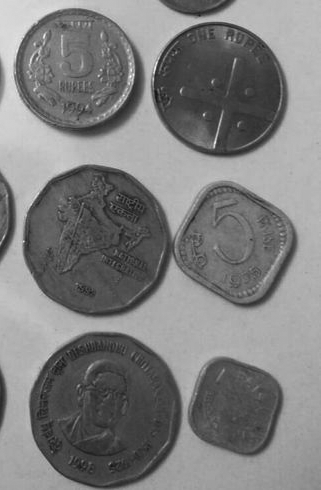

In [26]:
coins = cv2.imread('../dane/Monety_szare.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

## SOBEL 

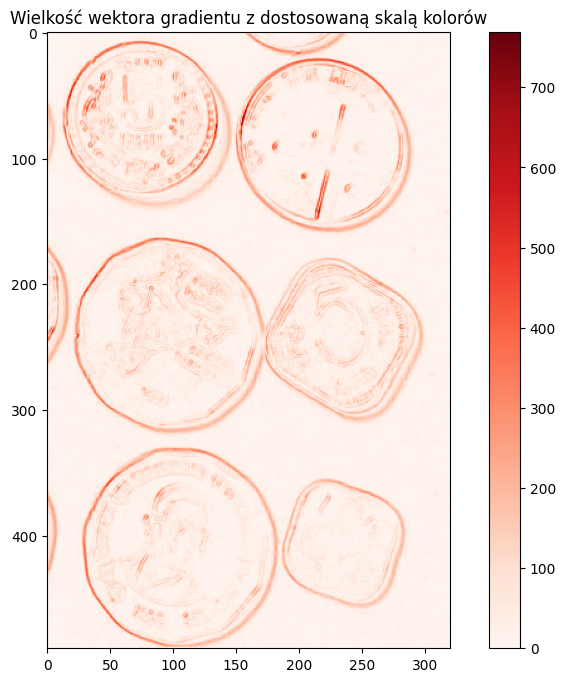

In [27]:
gradient_x = cv2.Sobel(coins, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(coins, cv2.CV_64F, 0, 1, ksize=3) 

magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

vmin, vmax = magnitude.min(), magnitude.max()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(magnitude, cmap='Reds', vmin=vmin, vmax=vmax)

cbar = plt.colorbar(im, ax=ax, orientation='vertical')

plt.title('Wielkość wektora gradientu z dostosowaną skalą kolorów')
plt.show()

## LAPLACIAN

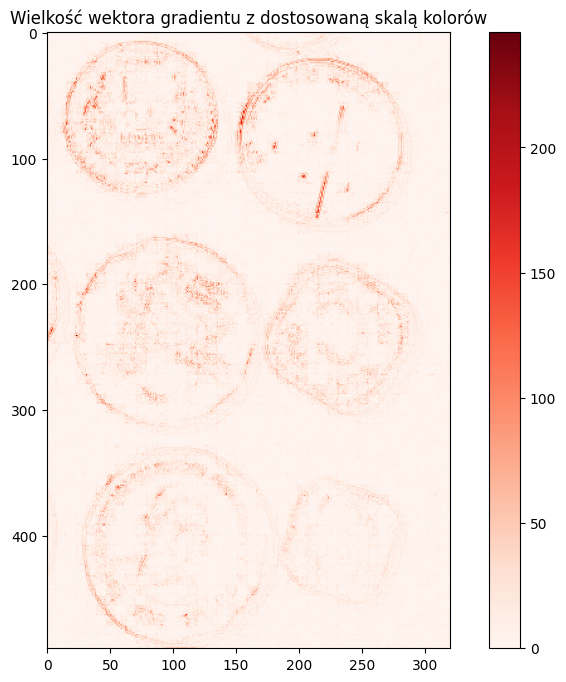

In [28]:
laplacian_xY = cv2.Laplacian(coins, cv2.CV_64F)

magnitude = np.sqrt(laplacian_xY**2)

vmin, vmax = magnitude.min(), magnitude.max()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(magnitude, cmap='Reds', vmin=vmin, vmax=vmax)

cbar = plt.colorbar(im, ax=ax)

plt.title('Wielkość wektora gradientu z dostosowaną skalą kolorów')
plt.show()

Rozwiązanie:

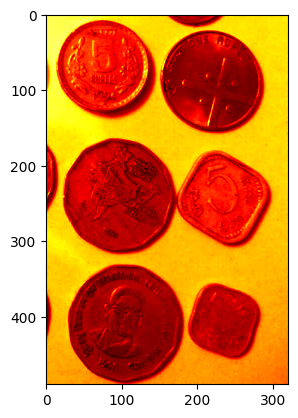

In [29]:
plt.imshow(coins, cmap='hot') # przykład wyświetlania z mapą kolorów

---

# Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów poprzez detekcję krawędzi. Wykorzystaj filtr Canny'ego dla różnych wartości progów oraz filtry redukcji szumu.

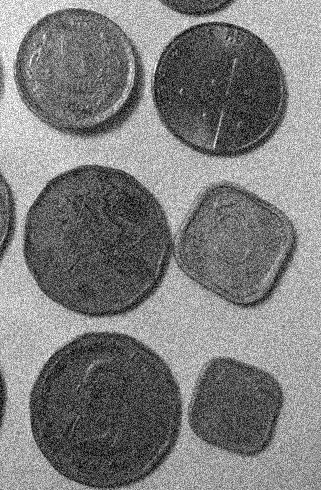

In [30]:
coins_noise = cv2.imread('../dane/Monety_szare_szum.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

In [48]:
# blur 
coins_gauss = cv2.GaussianBlur(coins_noise, (7,7), 0)
coins_median = cv2.medianBlur(coins_noise, 5)
coins_bilateral = cv2.bilateralFilter(coins_noise, 5, 75, 75)

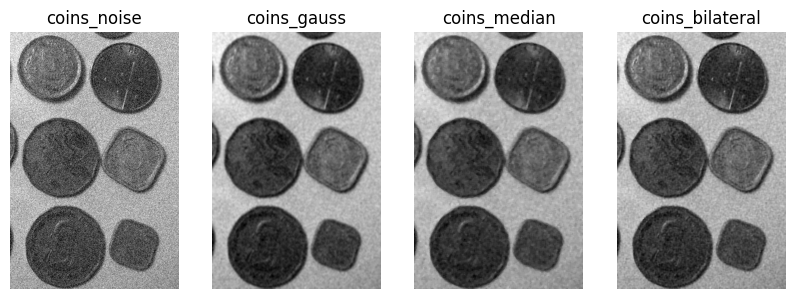

In [49]:
display_images([coins_noise, coins_gauss, coins_median, coins_bilateral], ['coins_noise', 'coins_gauss', 'coins_median', 'coins_bilateral'], True)

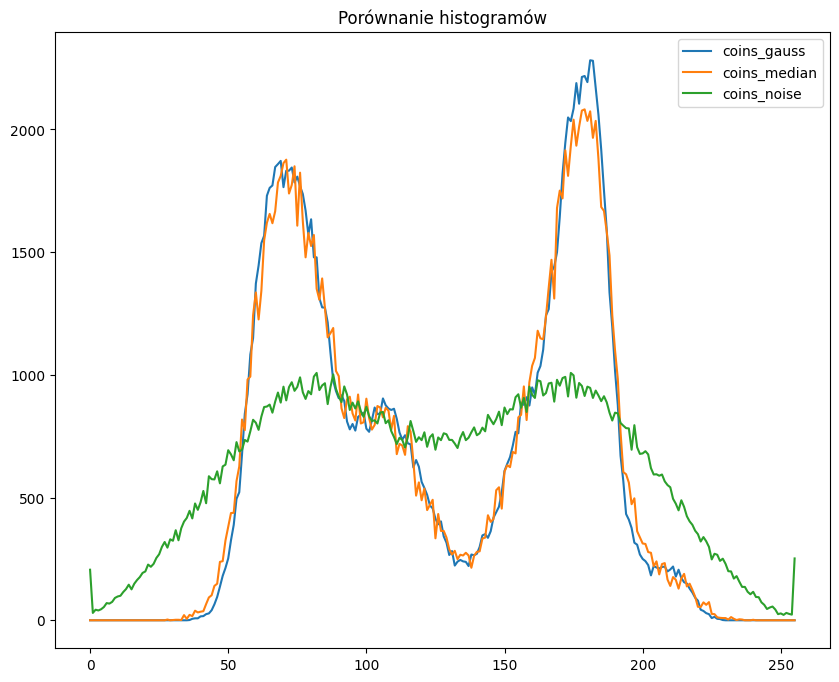

In [51]:
hist_gauss = cv2.calcHist([coins_gauss], [0], None, [256], [0, 256])
hist_median = cv2.calcHist([coins_median], [0], None, [256], [0, 256])
hist_coins = cv2.calcHist([coins_noise], [0], None, [256], [0, 256])

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(hist_gauss, label='coins_gauss')
ax.plot(hist_median, label='coins_median')
ax.plot(hist_coins, label='coins_noise')
ax.legend()
plt.title("Porównanie histogramów")
plt.show()

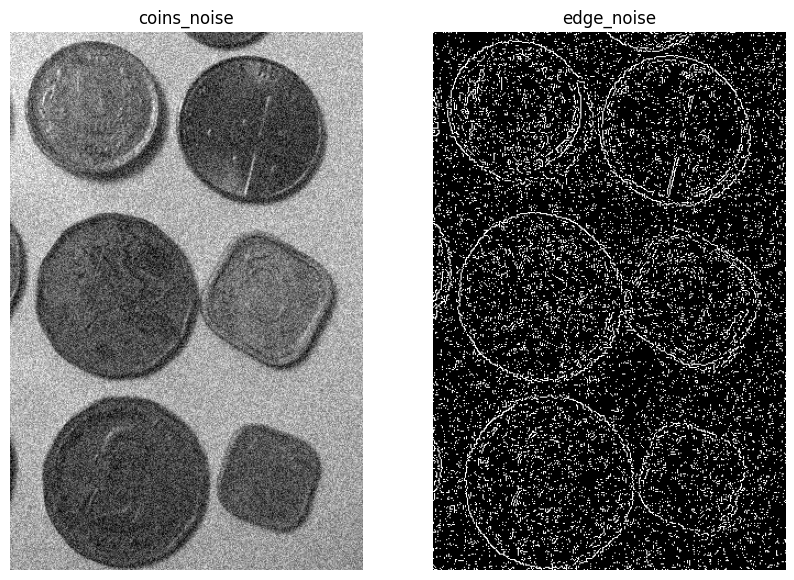

In [52]:
edge_noise = cv2.Canny(coins_noise, 250, 255)
display_images([coins_noise, edge_noise], ['coins_noise', 'edge_noise'], True)


### Górny próg

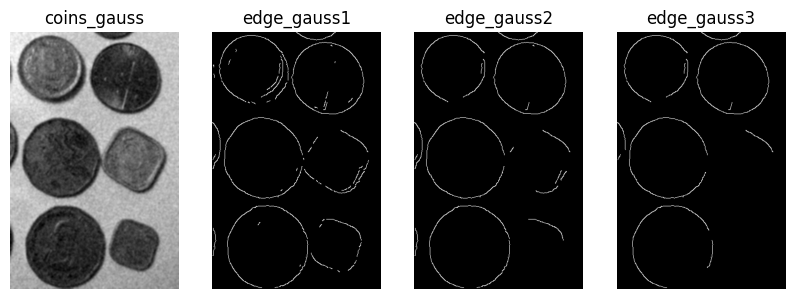

In [53]:
edge_gauss1 = cv2.Canny(coins_gauss, 150, 180)
edge_gauss2 = cv2.Canny(coins_gauss, 150, 225)
edge_gauss3 = cv2.Canny(coins_gauss, 150, 255)
display_images([coins_gauss, edge_gauss1, edge_gauss2, edge_gauss3], ['coins_gauss', 'edge_gauss1', 'edge_gauss2', 'edge_gauss3'], True)wida

widać szybki zanik krawędzi przy zbyt wysokim progu górnym, przez co średnie zmiany nie są nawet wykrywane

### Dolny próg

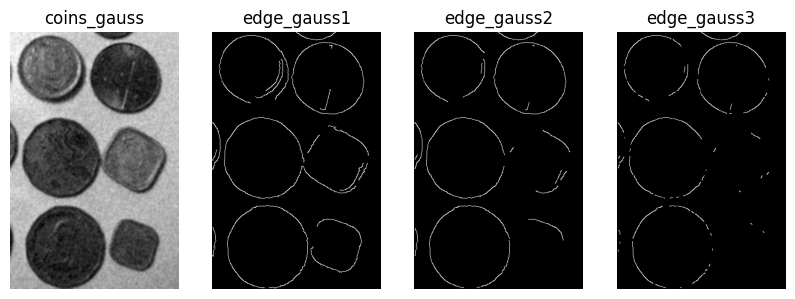

In [54]:
edge_gauss1 = cv2.Canny(coins_gauss, 100, 225)
edge_gauss2 = cv2.Canny(coins_gauss, 150, 225)
edge_gauss3 = cv2.Canny(coins_gauss, 200, 225)
display_images([coins_gauss, edge_gauss1, edge_gauss2, edge_gauss3], ['coins_gauss', 'edge_gauss1', 'edge_gauss2', 'edge_gauss3'], True)

widać że mocniejsze linie są wychwytywane jednak, brak im ciągłości przez wysoki prog dolny

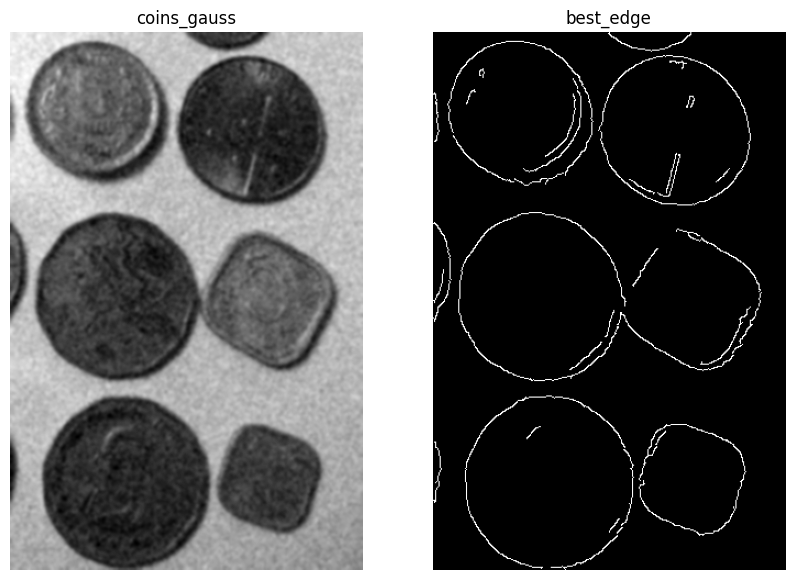

In [75]:
best_edge = cv2.Canny(coins_gauss, 95, 180)
display_images([coins_gauss, best_edge], ['coins_gauss', 'best_edge'], True)

---

# Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów.

In [38]:
dst = cv2.equalizeHist(coins_noise)

hist_coins = cv2.calcHist([coins_noise], [0], None, [256], [0, 256])
hist_dst = cv2.calcHist([dst], [0], None, [256], [0, 256])

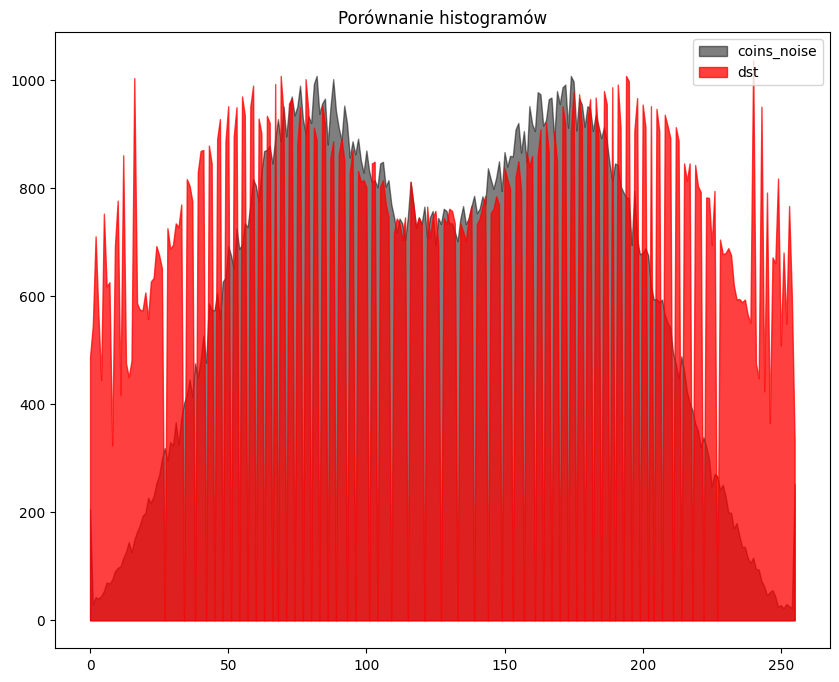

In [39]:
# fill between
fig, ax = plt.subplots(figsize=(10, 8))
ax.fill_between(np.arange(256), hist_coins.flatten(), label='coins_noise', alpha=0.5, color = 'black')
ax.fill_between(np.arange(256), hist_dst.flatten(), label='dst', alpha=0.75, color = 'r')
ax.legend()
plt.title("Porównanie histogramów")
plt.show()

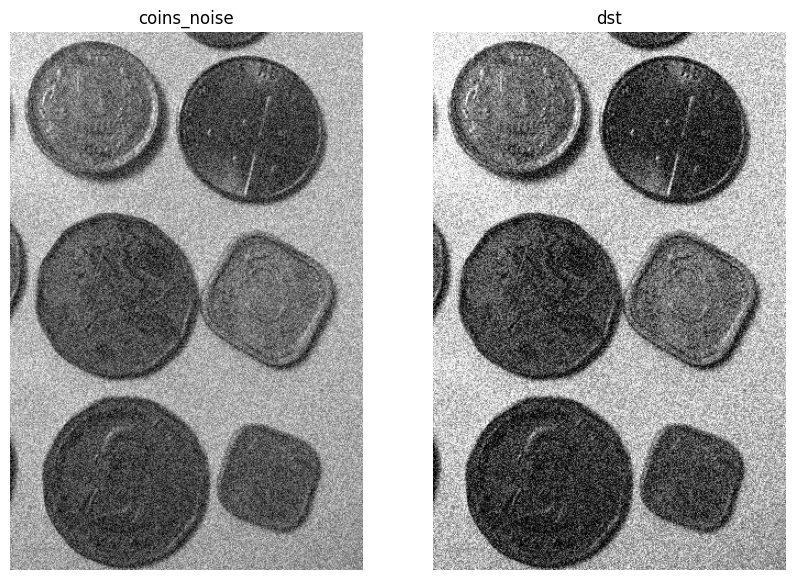

In [40]:
display_images([coins_noise, dst],['coins_noise', 'dst'], True)

---

# Zad. 4: Transformacja do rozkładu docelowego

Dla obrazów `hare_gray` i `hare_color` wykonaj transformacje na składowych S i/lub V modelu HSV, przechodząc do wybranego (założonego) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu.

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [cv2.LUT](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

**4A** (`hare_gray`):

In [41]:
hare_gray = cv2.imread('../dane/Zajac.jpg', cv2.IMREAD_GRAYSCALE)
hare_hsv = cv2.cvtColor(hare_gray, cv2.COLOR_BGR2HSV)
Image.fromarray(hare_gray)

error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<3, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 5, -1>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 5, -1>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


Rozwiązanie:

---

**4B** (`hare_color`):

In [ ]:
hare_color = cv2.imread('../dane/Zajac_kolor.jpg')
Image.fromarray(hare_color[..., ::-1])

Rozwiązanie: